In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load datasets
file_path_1 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_DEU.csv'  
file_path_2 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_CHN.csv' 
file_path_3 = r'../../6_cleaned_files/ESOC/ESOC Dataset Cleaned.csv'      
file_path_4 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_BRA.csv'  
file_path_5 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_ESP.csv'  
file_path_6 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_IND.csv'   
file_path_7 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_ITA.csv' 
file_path_8 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_TUR.csv'    
file_path_9 = r'../../4_integrated_csv_files/covid_19_api_data/01_01_2020_01_01_2021_USA.csv'    

data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)
data_3 = pd.read_csv(file_path_3)
data_4 = pd.read_csv(file_path_4)
data_5 = pd.read_csv(file_path_5)
data_6 = pd.read_csv(file_path_6)
data_7 = pd.read_csv(file_path_7)
data_8 = pd.read_csv(file_path_8)
data_9 = pd.read_csv(file_path_9)

In [3]:
# Ensure date columns are in datetime format
data_1['date'] = pd.to_datetime(data_1['date'])
data_2['date'] = pd.to_datetime(data_2['date'])
data_4['date'] = pd.to_datetime(data_4['date'])
data_5['date'] = pd.to_datetime(data_5['date'])
data_6['date'] = pd.to_datetime(data_6['date'])
data_7['date'] = pd.to_datetime(data_7['date'])
data_8['date'] = pd.to_datetime(data_8['date'])
data_9['date'] = pd.to_datetime(data_9['date'])

# Ensure the 'Publication_Date' column is in datetime format
data_3['Publication_Date'] = pd.to_datetime(data_3['Publication_Date'], dayfirst=True, errors='coerce')

data_1['Country'] = 'Germany'
data_2['Country'] = 'China'
data_4['Country'] = 'Brazil'
data_5['Country'] = 'Spain'
data_6['Country'] = 'India'
data_7['Country'] = 'Italy'
data_8['Country'] = 'Turkey'
data_9['Country'] = 'USA'


In [4]:
# Group by 'Publication_Date' and count the number of articles for each date
news_by_date = data_3.groupby('Publication_Date').size().reset_index(name='news_count')

# Rename 'Publication_Date' to 'date' for consistency
news_by_date.rename(columns={'Publication_Date': 'date'}, inplace=True)

# Merge this data with the fatalities dataset
fatalities_by_date = data_1.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_2.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_4.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_5.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_6.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_7.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_8.groupby('date')['deaths'].sum().reset_index()
fatalities_by_date = data_9.groupby('date')['deaths'].sum().reset_index()

merged_data1 = pd.concat([data_1, data_2, data_4,data_5, data_6, data_7,data_8, data_9], ignore_index=True)

# Merge the datasets on 'date'
merged_data = pd.merge(fatalities_by_date, news_by_date, on='date', how='inner')

# Ensure both datasets have a 'date' column in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data1['date'] = pd.to_datetime(merged_data1['date'])

# Merge the datasets on 'date'
final_data = pd.merge(merged_data1, merged_data[['date', 'news_count']], on='date', how='inner')

# Check the result
print(final_data.head())

        date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0 2020-01-28          4       0          0               0            0   
1 2020-01-29          4       0          0               0            0   
2 2020-01-30          4       0          0               0            0   
3 2020-01-31          5       0          0               1            0   
4 2020-02-01          8       0          0               0            0   

   recovered_diff          last_update  active  active_diff  fatality_rate  \
0               0  2020-01-28 23:00:00       4            0            0.0   
1               0  2020-01-29 19:30:00       4            0            0.0   
2               0  2020-01-30 16:00:00       4            0            0.0   
3               0  2020-01-31 23:59:00       5            1            0.0   
4               0  2020-02-01 18:33:00       8            0            0.0   

   iso     name province      lat     long cities  Country  news_count  
0  DEU 

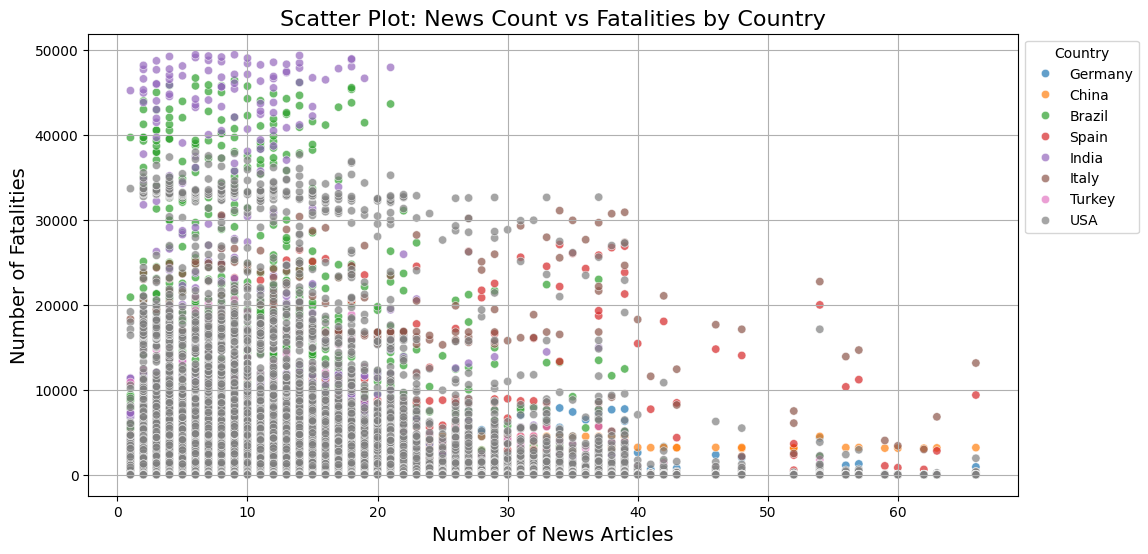

In [5]:
# Ensure all required columns are present for plotting (e.g., news_count and deaths)
if 'news_count' not in merged_data.columns:
    merged_data['news_count'] = merged_data.groupby('date')['date'].transform('count')  
if 'deaths' not in merged_data.columns:
    merged_data['deaths'] = merged_data['deaths_diff'].cumsum()  # Calculate cumulative deaths if not present

# Scatter plot: News Count vs Fatalities by Country
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_data, x='news_count', y='deaths', hue='Country', palette='tab10', alpha=0.7)
plt.title('Scatter Plot: News Count vs Fatalities by Country', fontsize=16)
plt.xlabel('Number of News Articles', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.savefig('../../8_final_visualisations/covid_19_api_misinformation_esoc_combined_visualisations/scatter_plot_news_count_vs_fatalaties_by_country.png', dpi=300)

plt.show()

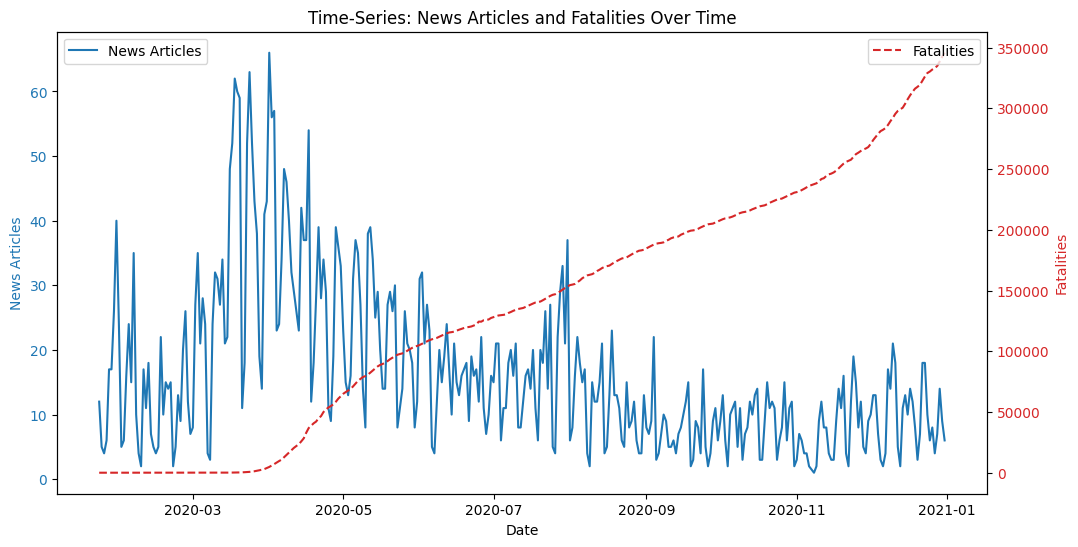

In [6]:
#Time-Series Overlay: News Count and Fatalities Over Time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot News Count
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('News Articles', color=color)
ax1.plot(merged_data['date'], merged_data['news_count'], color=color, label='News Articles')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Plot Fatalities
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Fatalities', color=color)
ax2.plot(merged_data['date'], merged_data['deaths'], color=color, label='Fatalities', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Time-Series: News Articles and Fatalities Over Time')

plt.savefig('../../8_final_visualisations/covid_19_api_misinformation_esoc_combined_visualisations/time_series_news_articles_and_fatalities_over_time.png', dpi=300)

plt.show()

/var/folders/82/02_3g97j3w76bqyztvpl684m0000gn/T/ipykernel_29173/163481076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=misinfo_type_counts.index, y=misinfo_type_counts.values, palette='viridis')


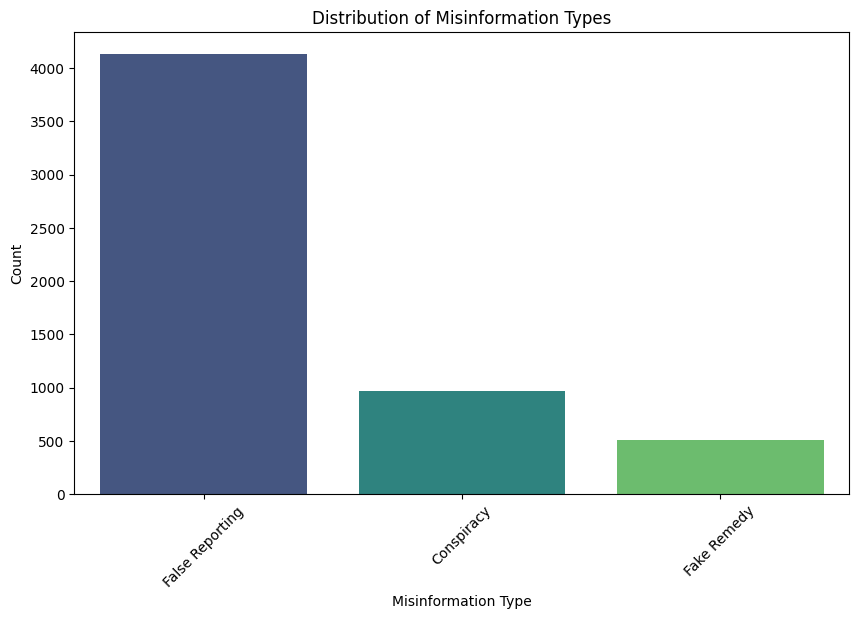

In [7]:
#Bar Chart: Distribution of Misinformation Types
plt.figure(figsize=(10, 6))
misinfo_type_counts = data_3['Misinfo_Type'].value_counts()
sns.barplot(x=misinfo_type_counts.index, y=misinfo_type_counts.values, palette='viridis')
plt.title('Distribution of Misinformation Types')
plt.xlabel('Misinformation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.savefig('../../8_final_visualisations/covid_19_api_misinformation_esoc_combined_visualisations/bar_chart_distribution_of_misinformation.png', dpi=300)

plt.show()

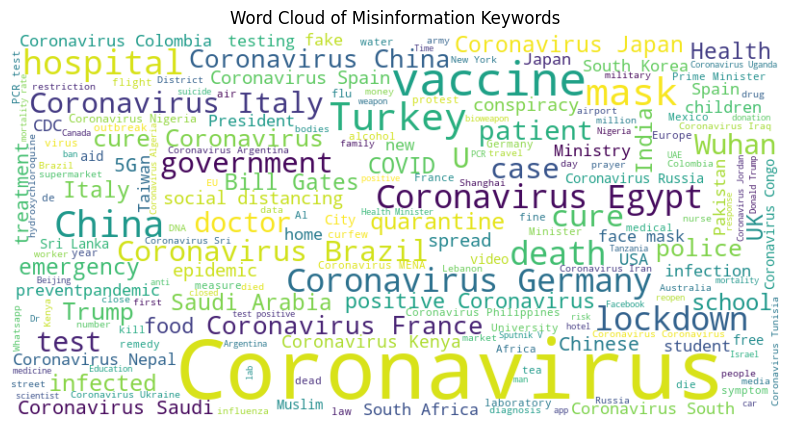

In [8]:
#Word Cloud: Common Keywords in Misinformation
all_keywords = ' '.join(data_3['Key_Words'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Misinformation Keywords')

plt.savefig('../../8_final_visualisations/covid_19_api_misinformation_esoc_combined_visualisations/word_cloud_misinformation.png', dpi=300)

plt.show()